This notebook tests the python btrack module.

In [1]:
from midap.tracking.bayesian_tracking import BayesianCellTracking

import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import regionprops
from scipy.spatial import distance
import pandas as pd
import os

### Load segmentations

In [2]:
# Load data
path = '../example_data/Pos58/TXRED'
images_folder = os.path.join(path, 'cut_im')
segmentation_folder = os.path.join(path, 'seg_im')

# glob all the cut images and segmented images
img_names_sort = np.sort(glob.glob(os.path.join(images_folder, '*frame*.png')))
seg_names_sort = np.sort(glob.glob(os.path.join(segmentation_folder, '*frame*.png')))

# Parameters:
crop_size = (128, 128)
target_size = (512, 512)
input_size = crop_size + (4,)
num_time_steps = len(img_names_sort)

### Run the tracking

In [3]:
tracker_obj = BayesianCellTracking(imgs=img_names_sort, segs=seg_names_sort, target_size=target_size)
tracker_obj.run_model()
#tracker_obj.tracker.tracks

[INFO][2022/12/08 04:22:11 PM] Localizing objects from segmentation...
[INFO][2022/12/08 04:22:11 PM] Found intensity_image data
[INFO][2022/12/08 04:22:11 PM] Calculating weighted centroids using intensity_image
[INFO][2022/12/08 04:22:11 PM] Objects are of type: <class 'dict'>
[INFO][2022/12/08 04:22:11 PM] ...Found 579 objects in 9 frames.
[INFO][2022/12/08 04:22:11 PM] Loaded btrack: /Users/franziskaoschmann/miniconda3/envs/midap/lib/python3.8/site-packages/btrack/libs/libtracker.dylib
[INFO][2022/12/08 04:22:11 PM] btrack (v0.4.6) library imported
[INFO][2022/12/08 04:22:11 PM] Starting BayesianTracker session
[INFO][2022/12/08 04:22:11 PM] Setting update_method -> BayesianUpdates.EXACT
[INFO][2022/12/08 04:22:11 PM] Loading configuration file: /Users/franziskaoschmann/Library/Caches/btrack-examples/examples/cell_config.json
[INFO][2022/12/08 04:22:11 PM] Setting max_search_radius -> 200
[INFO][2022/12/08 04:22:11 PM] Setting features -> ['area', 'major_axis_length', 'minor_axis_l

GLPK Integer Optimizer 5.0
360 rows, 281 columns, 384 non-zeros
281 integer variables, all of which are binary
Preprocessing...
180 rows, 281 columns, 384 non-zeros
281 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 180
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
180 rows, 281 columns, 384 non-zeros
*     0: obj =   1.376219178e+02 inf =   0.000e+00 (21)
*    21: obj =   7.588377784e+01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step dual simplex will be used
+    21: mip =     not found yet >=              -inf        (1; 0)
+    21: >>>>>   7.588377784e+01 >=   7.588377784e+01   0.0% (1; 0)
+    21: mip =   7.588377784e+01 >=     tree is empty   0.0% (0; 1)
INTEGER OPTIMAL SOLUTION FOUND


In [4]:
#tracker_obj.tracks[0]

### Visualizing the tracking

In [10]:
tracker_obj.convert_data()
tracker_obj.generate_label_stack()
tracker_obj.correct_label_stack()


In [11]:
tracker_obj.track_output_correct.iloc[50:100]

,trackID,trackID_d1,trackID_d2,trackID_mother,split_frame,area,x,y,intensity_mean,intensity_min,intensity_max,first_frame,last_frame
frame,,,,,,,,,,,,,
0,51,51,51,51,NaN,96.0,209.629985,502.371620,0.145711,0.057304,0.210534,0,8
0,52,52,52,52,NaN,53.0,251.339250,498.206728,0.183566,0.125167,0.237609,0,8
0,53,53,53,53,NaN,91.0,275.489246,503.837178,0.258819,0.113562,0.391127,0,8
0,54,54,54,54,NaN,60.0,42.136216,504.839473,0.176800,0.118228,0.246181,0,8
0,55,55,55,55,NaN,76.0,21.523606,506.929656,0.245887,0.130928,0.363252,0,4
0,56,56,56,56,NaN,39.0,433.080065,508.402507,0.246799,0.111892,0.358007,0,8
0,57,57,57,57,NaN,18.0,370.303145,510.272068,0.081741,0.054507,0.097076,0,3
0,58,58,58,58,NaN,16.0,421.176232,510.462646,0.025285,0.013713,0.048633,0,4
0,59,59,59,59,NaN,5.0,225.898925,510.748071,0.050448,0.029212,0.072929,0,8


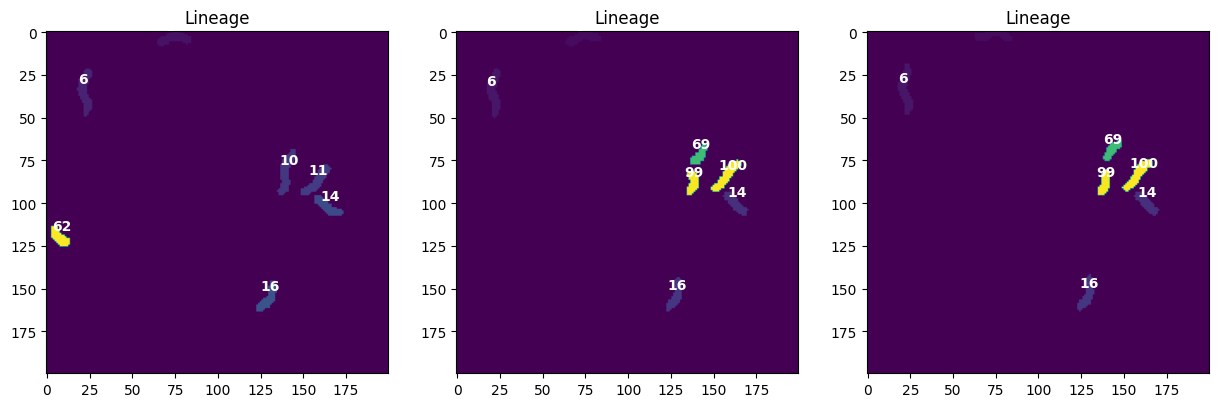

In [28]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1,3,1)
img = label_stack[1][:200,200:400]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')

ax = plt.subplot(1,3,2)
img = label_stack[2][:200,200:400]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')

ax = plt.subplot(1,3,3)
img = label_stack[3][:200,200:400]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')

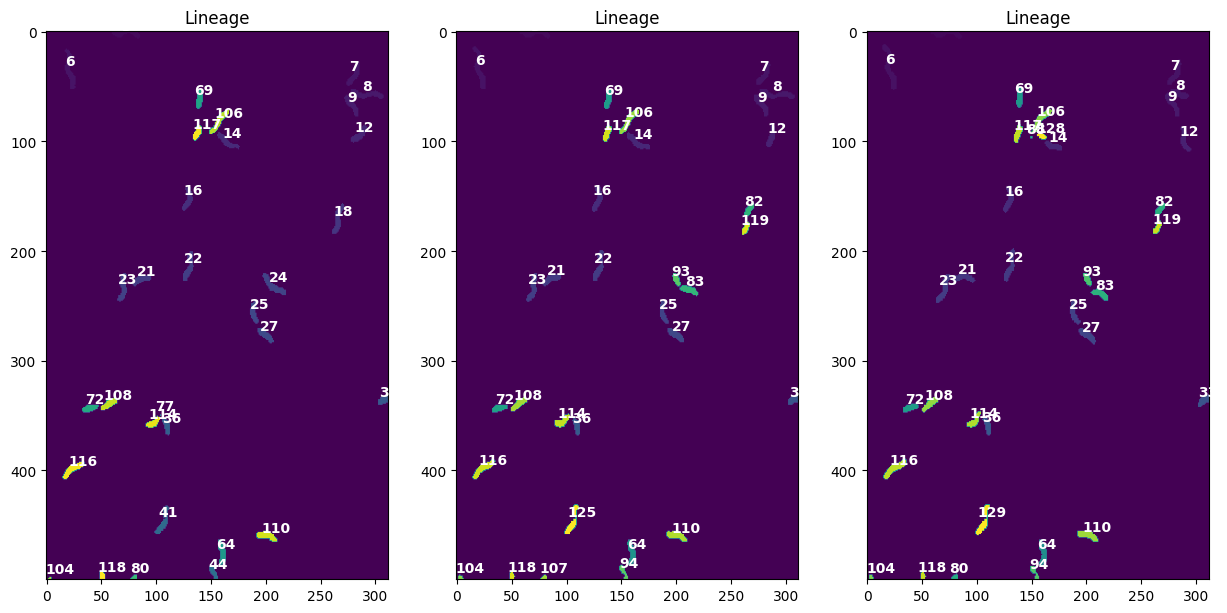

In [89]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1,3,1)
img = label_stack_correct[6][:500,200:]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')

ax = plt.subplot(1,3,2)
img = label_stack_correct[7][:500,200:]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')

ax = plt.subplot(1,3,3)
img = label_stack_correct[8][:500,200:]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')